$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Neural Network Regression

*Yinzhi Deng / 830888654*

## Overview

### Linear Models as Neural Networks

Given $X$ and $T$, find $\wv_k$ that minimizes squared error in
the $k^{th}$ output, then use it to make predictions.
Collect all $\wv_k$ as columns in $\Wv$.
$\tilde{\Xv}$ denotes $\Xv$ with  constant 1 column.  The target value
for the $k^{th}$ output for the $n^{th}$ sample is $t_{n,k}$.

$$
\begin{align*}
  E(\Wv) &= \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - \tilde{\xv}_n^T \wv_k)^2\\
   \Wv &= (\tilde{\Xv}^T \tilde{\Xv})^{-1} \tilde{\Xv}^T \Tv\\
 ~\\
  \Wv &= \begin{bmatrix}
    w_{0,1} & w_{0,2} & \cdots & w_{0,K}\\
    w_{1,1} & w_{1,2} & \cdots & w_{1,K}\\
    \vdots\\
    w_{D,1} & w_{D,2} & \cdots & w_{D,K}
  \end{bmatrix}\\
 ~\\
  \Yv &= \tilde{\Xv} \Wv\\
  ~\\
\tilde{\Xv} & \text{ is } N \times (D+1)\\
\Wv & \text{ is } (D+1) \times K\\
\Yv & \text{ is } N \times K
\end{align*}
$$

The calculation of $y_{n,k} = \tilde{\xv_n} \wv_k$ can be drawn as


<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinear.png">

### Adding Nonlinear Combinations of Inputs

Transform $X$ into $\Phiv(X)$.  For example, 

$$
\Phiv(X) = \Phiv\left ( 
\begin{bmatrix}
    x_{0,1} & x_{0,2} & \cdots \\
    x_{1,1} & x_{1,2} & \cdots \\
    \vdots\\
    x_{N-1,1} & x_{N-1,2} & \cdots
  \end{bmatrix}
\right ) = 
\begin{bmatrix}
    x_{0,1} & x_{0,2}^5  & x_{0,2}^3 x_{0,4}^2 & \cdots \\
    x_{1,1} & x_{1,2}^5  & x_{1,2}^3 x_{1,4}^2 & \cdots\\
    \vdots\\
    x_{N-1,1} & x_{N-1,2}^5 & x_{N-1,2}^3 x_{N-1,4}^2 & \cdots
  \end{bmatrix}
$$

Now we just replace $\Xv$ by $\Phiv$ (which we use to represent
$\Phiv(X)$, and $\Phiv_n = \Phiv(\xv_n)$) and proceed. 
We do our derivation to minimize

$$
  E_k = \sum_{n=1}^N (t_{n,k} - \tilde\Phiv_n^T \wv_k))^2
$$

from which we find that 

$$
  \Wv = (\tilde{\Phiv}^T \tilde{\Phiv})^{-1} \tilde{\Phiv}^T T
$$

and use it like

$$
\begin{align*}
  \Yv = \tilde{\Phiv} \Wv
\end{align*}
$$

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinearphi.png">

This is called Neural Network if the inputs are modified and added by some nonlinear elements before they are used to calculate the derivation.

## Required Code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import neuralnetworks as nn
%matplotlib inline

In [4]:
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

### Linear Model

The linear model part remains the same as before.

In [5]:
def trainLinear(X,T,parameters):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    d = X.shape[1]
    X = np.divide((X-means),stds)
    X = addOnes(X)
    lambDiag = np.eye(d+1) * parameters
    lambDiag[0,0] = 0
    w = np.linalg.lstsq( X.T @ X + lambDiag, X.T @ T)
    #w = np.linalg.lstsq(np.dot(X.T,X),np.dot(X.T,T))
    w = w[0]
    return {'means':means,'stds':stds,'w':w,'lamb':lambDiag}

In [6]:
def evaluateLinear(model,X,T):
    means = model['means']
    stds = model['stds']
    X = np.divide((X-means),stds)
    X = addOnes(X)
    w = model['w']
    predict = np.dot(X, w)
    error = np.sqrt(np.mean((predict - T) ** 2))
    return error

### Neural Network Model

For constructing the neural network model, the NeuralNetworks.py is used to build the train model and the evaluate function.

In [41]:
def trainNN(X,T,parameters):
    # the layer number of the inputs and the outputs depends on their elements
    input_layer = X.shape[1]
    output_layer = T.shape[1]
    nnet = nn.NeuralNetwork(input_layer,parameters[0],output_layer)
    #nnet = nn.NeuralNetwork(1,parameters[0],1)
    return nnet.train(X, T, nIterations=parameters[1])

In [8]:
def evaluateNN(model,X,T):
    predict = model.use(X)
    error = np.sqrt(np.mean((predict - T) ** 2))
    return error

### New Version

In [9]:
def trainValidateTestKFolds(trainf,evaluatef,X,T,parameterSets,nFolds,
                            shuffle=False,verbose=False):
    # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    # Calculate number of samples in each of the nFolds folds
    nSamples = X.shape[0]
    nEach = int(nSamples / nFolds)
    if nEach == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    # Store in startsStops as list of (start,stop) pairs
    starts = np.arange(0,nEach*nFolds,nEach)
    stops = starts + nEach
    stops[-1] = nSamples
    startsStops = list(zip(starts,stops))
    # Repeat with testFold taking each single fold, one at a time
    results = []

    # COMPLETE THIS FUNCTION BY IMPLEMENTING THE FOLLOWING STEPS.

    # For each test fold
    for testFold in range(nFolds):
        bestParmList = []
        errorSet = []
        for parmSet in parameterSets:  # For each set of parameter values, called parmSet
            # Find best set of parameter values
            # For each validate fold (except when same as test fold)
            errorSum = 0
            #errorSet = []
            for validateFold in range(nFolds):
                if testFold == validateFold:
                    continue
                # Use trainf to fit model to training data using parmSet
                trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                rows = []
                for tf in trainFolds:
                    a,b = startsStops[tf]                
                    rows += rowIndices[a:b].tolist()
                Xtrain = X[rows,:]
                Ttrain = T[rows,:]
                # Construct Xvalidate and Tvalidate
                a,b = startsStops[validateFold]
                rows = rowIndices[a:b]
                Xvalidate = X[rows,:]
                Tvalidate = T[rows,:]
                # Construct Xtest and Ttest
                a,b = startsStops[testFold]
                rows = rowIndices[a:b]
                Xtest = X[rows,:]
                Ttest = T[rows,:]
                model = trainf(Xtrain,Ttrain,parmSet)
                # Calculate the error of this model by calling evaluatef with 
                #  the model and validation data
                error = evaluatef(model,Xvalidate,Tvalidate)
                errorSum = errorSum + error
            # Calculate the mean of these errors.
            errorMean = errorSum / nFolds
            # If this error is less than the previously best error for parmSet, 
            # update best parameter values and best error
            errorSet.append([parmSet,errorMean])
            
        # Make a new set of training data by concatenating the training and 
        # validation data from previous step.
        #print(errorSet)
        errorSet = np.array(errorSet)
        bestindex = np.argmin(errorSet[:,1])
        bestResults = errorSet[bestindex,:]
        
        newXtrain = np.vstack((Xtrain,Xvalidate))
        newTtrain = np.vstack((Ttrain,Tvalidate))
        # Retrain, using trainf again, to fit a new model using the best set of parameter values
        #  found above, to this new training data.
        new_model = trainf(newXtrain,newTtrain,bestResults[0])
        # Calculate error of this new model on the test data, and also on the new 
        #  training data.
        new_testerror = evaluatef(new_model,Xtest,Ttest)
        new_trainerror = evaluatef(new_model,newXtrain,newTtrain)
        # Construct a list of the best parameter values with this training error, 
        #  the mean of the above valdiation errors, and the testing error. The mean of
        #  the above validation errors means the mean error over the validation folds for
        #  the best parameter values found.  So, nothing to recalculate.  Just use the mean
        #  validation set error from above that was used to pick the best parameter values.
        
        bestParmList = [bestResults[0],new_trainerror,bestResults[1],new_testerror]
        # Print this list if verbose == True
        if verbose:
            print(bestParmList)
        # Append this list to a result list
        results.append(bestParmList)
    # Return this result list
    results = np.array(results)
    return results

## Data

The data I use is called Boston Housing Data. It was found from http://archive.ics.uci.edu/ml/datasets/Housing and this dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. And here are the meanings of each attribute below:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [10]:
data = np.loadtxt('housing.data')

In [11]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [12]:
T = data[:,13:]
X = data[:,0:13]
Xnames = names[0:13]
Tname = names[13]

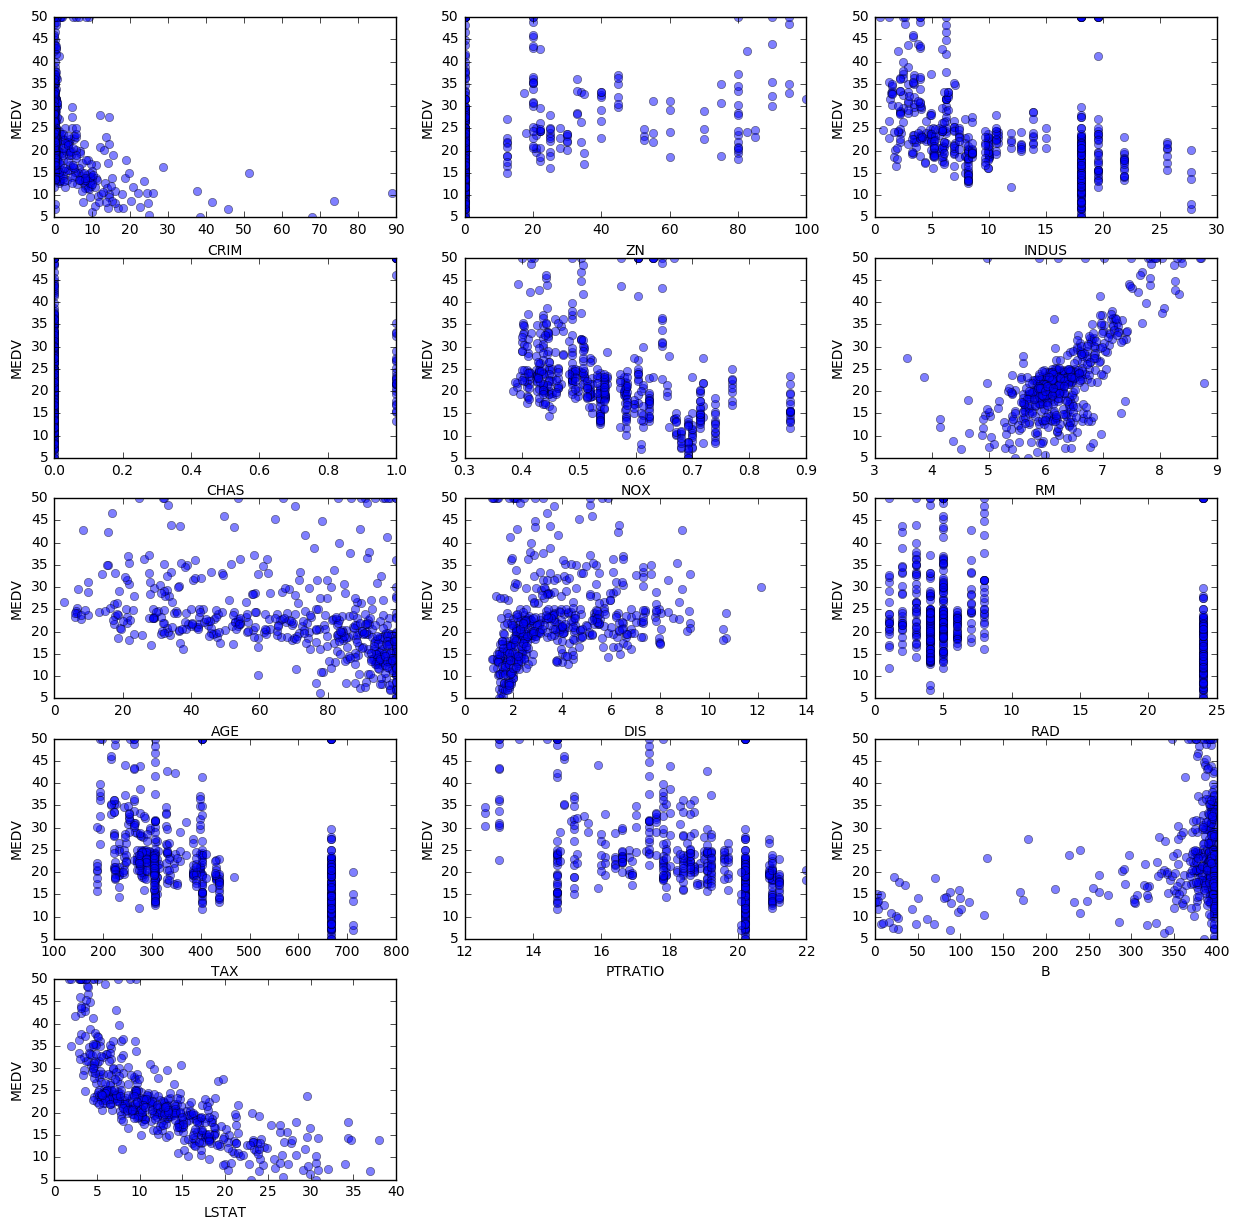

In [13]:
plt.figure(figsize=(15,15))
for c in range(X.shape[1]):
    plt.subplot(5,3, c+1)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])

From the plots above, I noticed that some of the inputs are obviouosly relative to the target value, such as RM, AGE, and LSTAT. However,the CHAS, RAD, and TAX look having no relationship with the MEDV.

## Results

Investigate the use of a linear model with various $\lambda$ values for your chosen data.  Then investigate the use of a neural network model on the same data for various sizes of hidden layers and numbers of iterations.
Discuss the results obtained, including the error values and the parameter values that result in the best performance.

Apply the `trainValidateTestKFolds` function, print the results, and discuss them.  How much variation is there in the best parameter values across different test folds?  Does the complexity of the models, in terms of the best parameters found, make sense?

### Linear Training

First, I used the parameters as shown on the example description to see what are the approximate results of the linear model.

In [32]:
result1 = trainValidateTestKFolds(trainLinear, evaluateLinear ,X, T, range(0,101,10), nFolds=5, shuffle=False)
print('Linear Model\n{:^10s} {:>10s} {:>10s} {:>10s}'.format('lambda', 'train', 'validate', 'test RMSE'))
for x in result1:
    print('{:^10.2f} {:>10.3f} {:10.3f} {:10.3f}'.format(*x))

Linear Model
  lambda        train   validate  test RMSE
  60.00         5.122      4.814      3.124
  100.00        4.969      5.485      4.915
  70.00         4.780      4.354      5.969
  100.00        3.846      3.940      8.291
  100.00        5.003      4.831      4.581


Due to the results created above, I can only know the approximate ranges of the three different errors, while it is no clue to find the effect to the errors when the fold numbers and the range of lambdas are changed. So, I decide to increase the number of fold and the range of lambda, to see the how the errors will change.

In [42]:
result1 = trainValidateTestKFolds(trainLinear, evaluateLinear ,X, T, range(0,401,10), nFolds=10, shuffle=False)
print('Linear Model\n{:^10s} {:>10s} {:>10s} {:>10s}'.format('lambda', 'train', 'validate', 'test RMSE'))
for x in result1:
    print('{:^10.2f} {:>10.3f} {:10.3f} {:10.3f}'.format(*x))

Linear Model
  lambda        train   validate  test RMSE
  60.00         4.955      4.651      2.794
  60.00         4.909      4.592      3.345
  50.00         4.915      4.622      2.927
  80.00         4.727      4.406      6.388
  80.00         4.816      4.447      5.459
  80.00         4.869      4.507      5.086
  70.00         4.963      4.598      3.323
  10.00         3.550      3.406     12.188
  90.00         4.785      4.392      5.335
  70.00         4.980      4.717      3.020


From the results after the parameters are modified, it is clear that the errors are reduced, while the reduction is not pretty effective. However, what is good is that I can confirm the best lambdas of different test folds are almost the same as 60 - 80. Then I plot the results to see the variation trend of three errors depend on different testing folds.

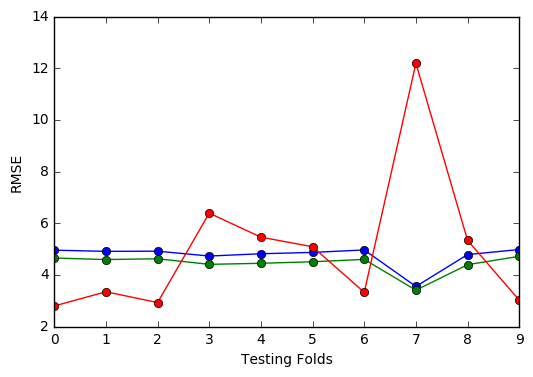

In [38]:
xaxis = range(result1.shape[0])
plt.plot(xaxis,result1[:,1],'o-',label='Training Error')
plt.plot(xaxis,result1[:,2],'o-',label='Validating Error')
plt.plot(xaxis,result1[:,3],'o-',label='Testing Error')
plt.xlabel('Testing Folds')
plt.ylabel('RMSE')

We can see the variation of training errors and validating errors are stable within about 4 - 6, while the range of testing errors are pretty unstable, especially the eight one, whose best lambda is 10 and the testing error reaches 12.

### Neural Network Training

The process is almost the same as the linear model part, I still use the parameters provided on example to see the what will the results look like.

In [26]:
import itertools
parms = list(itertools.product([2, 5, 10, 20, [5, 5], [10, 2, 10]], [10, 20, 100, 500]))
result2 = trainValidateTestKFolds(trainNN, evaluateNN, X, T, parms, nFolds=5, shuffle=False)
print('NN Model\n{:>30s} {:>10s} {:>10s} {:>10s}'.format('(Hidden Units, Iterations)', 'train', 'validate', 'test RMSE'))
for x in result2:
    print('{:>30s} {:10.3f} {:10.3f} {:10.3f}'.format(str(x[0]), *x[1:]))

NN Model
    (Hidden Units, Iterations)      train   validate  test RMSE
             ([10, 2, 10], 20)      4.381      4.774      3.276
                 ([5, 5], 100)      1.974      4.627      5.421
                  ([5, 5], 20)      3.835      4.361      4.828
                  ([5, 5], 20)      3.247      4.086      7.955
             ([10, 2, 10], 20)      5.218      4.492      5.267


We can see the errors are reduced a little when the model is changed to neural network with the same fold number. What I want to see is the effect to the results when the hidden layers number changes and the iteration time changes, so I keep going to set one of the variables in a range and the other one remain a single value.

In [29]:
import itertools
parms = list(itertools.product([2, 5, 10, 20, [5, 5], [10, 2, 10], [10,2,2,10]], [500]))
result2 = trainValidateTestKFolds(trainNN, evaluateNN, X, T, parms, nFolds=5, shuffle=False)
print('NN Model\n{:>30s} {:>10s} {:>10s} {:>10s}'.format('(Hidden Units, Iterations)', 'train', 'validate', 'test RMSE'))
for x in result2:
    print('{:>30s} {:10.3f} {:10.3f} {:10.3f}'.format(str(x[0]), *x[1:]))

NN Model
    (Hidden Units, Iterations)      train   validate  test RMSE
                      (2, 500)      3.439      5.162      3.338
                      (2, 500)      2.978      5.305      3.929
                 ([5, 5], 500)      1.651      5.383     11.659
                      (5, 500)      1.979      4.687      5.890
                 ([5, 5], 500)      1.599      5.329     16.589


I keep the iteration of the hidden layers and also add a 4 hidden layer choice, and the iteration time is set as one fixed value '500'. The results show some of errors are reduced but also some of them are increased to a larger value which means it is not a good choice. And it is weird that most of the best parameters have only one hidden layer. I thought it should be better as the number of hidden layer increased, because it can provide the data deep learning.

I decided to set the hidden layer choice as a fixed 4 hidden layer, and make the iteration as a range from 10 to 2000, to see whether the results will become better. Also, the fold number is modified from 5 to 10.

In [39]:
import itertools
parms = list(itertools.product([[10,2,2,10]], [10, 20, 100, 500, 1000, 2000]))
result2 = trainValidateTestKFolds(trainNN, evaluateNN, X, T, parms, nFolds=10, shuffle=False)
print('NN Model\n{:>30s} {:>10s} {:>10s} {:>10s}'.format('(Hidden Units, Iterations)', 'train', 'validate', 'test RMSE'))
for x in result2:
    print('{:>30s} {:10.3f} {:10.3f} {:10.3f}'.format(str(x[0]), *x[1:]))

NN Model
    (Hidden Units, Iterations)      train   validate  test RMSE
          ([10, 2, 2, 10], 20)      4.809      4.655      3.063
         ([10, 2, 2, 10], 100)      2.271      4.153      2.448
         ([10, 2, 2, 10], 100)      2.272      4.211      3.432
         ([10, 2, 2, 10], 100)      2.193      4.110      4.749
          ([10, 2, 2, 10], 20)      3.986      4.721      4.467
         ([10, 2, 2, 10], 100)      2.426      4.277      3.205
          ([10, 2, 2, 10], 20)      4.413      4.327      2.776
         ([10, 2, 2, 10], 100)      2.266      3.337      9.350
          ([10, 2, 2, 10], 20)      4.029      4.158      5.641
         ([10, 2, 2, 10], 100)      2.306      3.821      3.582


The results above show a good news which is the errors are reduced to a much better ones. And it is intersting that all the best parameters choices happen when the iteration times are 20 or 100. As I know, it should be better as the iteration times grow. More the iteration times, deeper the training. I think it may be because the neural network errors of my data set are convegented when the iteration times become 20 or 100, which means even if the iteration keeps going, there is still no help to reduce the errors.

Finally, I plot the results above to see the variation trend of three errors.

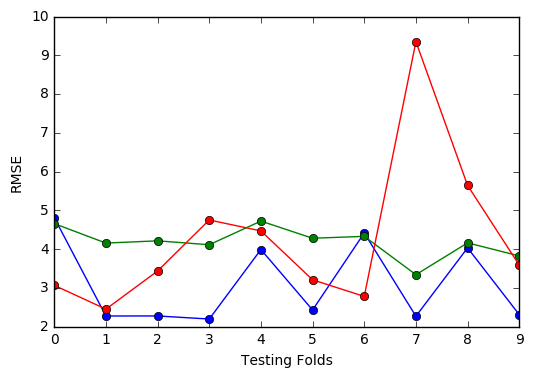

In [40]:
xaxis = range(result2.shape[0])
plt.plot(xaxis,result2[:,1],'o-',label='Training Error')
plt.plot(xaxis,result2[:,2],'o-',label='Validating Error')
plt.plot(xaxis,result2[:,3],'o-',label='Testing Error')
plt.xlabel('Testing Folds')
plt.ylabel('RMSE')

Compare the plotting of neural network model to the linear model, the range of training errors and validating errors are reduced from 4 - 6 to 2 - 5, which shows the benefit of the neural network model. And for the testing errors, the maximum value is also decreased from 12.188 to 9.35.

From the result2, we can see the best testing errors happen when the parameters are ([10, 2, 2, 10], 100), then let's see what the neural network looks like.

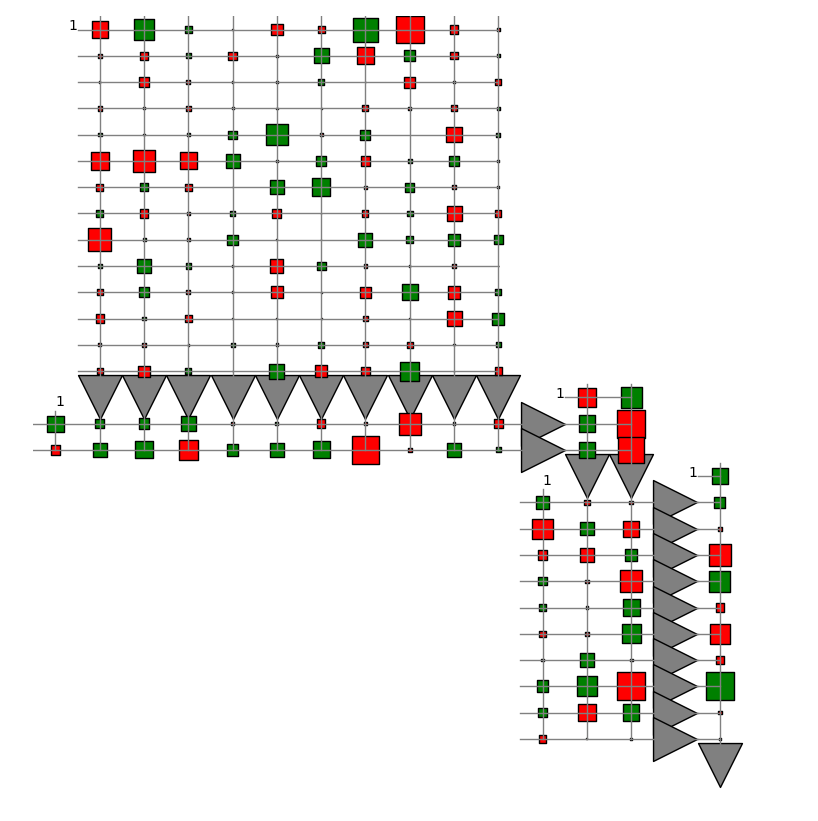

In [43]:
input_layer = X.shape[1]
output_layer = T.shape[1]
nnet = nn.NeuralNetwork(input_layer,[10, 2, 2, 10],output_layer)
nnet.train(X, T, nIterations=100)
plt.figure(figsize=(10, 10))
nnet.draw()

## Grading

Your notebook will be run and graded automatically. Download [A3grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A3grader.tar) and extract `A3grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  You should see a perfect score of 80/100 if your functions are defined correctly.  The remaining 20% will be based on the instructors reading of your notebooks.  We will be looking for how well the method is explained in text with some LaTeX math, and how well the results are summarized.

In [44]:
%run -i "A3grader.py"

 Testing: result = trainValidateTestKFolds(trainLinear,evaluateLinear,X,T,
                  range(0,101,10),nFolds=5,shuffle=False)
 Your result is
    10   3.158   3.306   2.414
    20   4.368   4.017   3.641
    10   3.245   3.343   5.03
    20   4.448   4.856   2.024
    20   2.426   2.377   10.89
20/20 points. First column, of best lambda values, is correct.
20/20 points. Columns of RMSE values are correct.

 Testing:
   import itertools
   parms = list(itertools.product([[5],[5,5],[2,2,2]], [10,50,100,200]))
   te = []
   for rep in range(5):
       result = trainValidateTestKFolds(trainNN,evaluateNN,X,T,
                                        parms,
                                        nFolds=4,shuffle=False)
       resulte = np.array([r[1:] for r in result])
       meanTestRMSE = resulte[:,-1].mean()
       print('     ',meanTestRMSE)
       te.append(meanTestRMSE)
      2.0113594311
      2.13279927048
      2.02349768237
      1.75667418353
      1.69421705928
40/40 point